# Fantasy Premier League Player Positions

### This project consists of looking into a game that is played by over 8.3 million people around the world and ways in which performance on a weekly basis can be maximised allowing people to attain the highest points possible. 

## How Does FPL work?

Fantasy Premier League is an online game where you are casted the role of a premier league manager. As a dedicated player of this game you must pick a squad of 15 players from the 20/21 premier league season which starts in August and ends in May. 

These players you have selected will then score points based on their performance in real-life live games. Each player depending on their position, contributions, impact will score varios points. Prices are given to players based on their form. Players performing well will rise in price and those that haven't performed will fall in value. 

- You have a starting budget of £100.0m to spend on a 15 man squad.
- There are 38 Gameweeks (GW) in total.




## How are points awarded?



## Other Rules & Important Information

### Squad Size
Your squad consists of 15 players:
- 2 Goalkeepers
- 5 Defenders
- 5 Midfielders
- 3 Forwards

### Budget 
The total value of an intitial squad should not exceed £100.0m.

### Players Per Team
**You are allowed to select only 3 players from a single Premier League team.** 

# Aim

The aim of this project is to identify which players are out-of-posistion from the initial position they were allocated by the developers of the game. For example, those who watch football would know which player plays where on the pitch through eye-test without the need for data. 

A goalkeeper is classified by clean sheets, saves, penalty saves.
A defender could be classified by clean sheets, tackles, interceptions, blocks, clearances and more.
A midfielder could be classified by chances created, threat, assists, passes, interceptions, tackles and more.
A forward could be classified by goals, assists and more.

However, taking these attributes into consideration has a player that was deemed for example a traditional midfielder, actually playing like a forward? Is a midfielder based off their statistics over the season actaully playing like a defender?

Correctly analysing these players will allow FPL players to make the right selections to maximise their GW points and rank higher in the leaderboards.

- Example: A midfielder returns more points for a goal than a forward. If this midfielder is predicted as a forward, fpl players can pick this player to get better returns



# Methodology

In order to solve this problem, this project uses machine learning to train and then predict the final model with correct positions. This will consist of importing relevant packages, cleaning the dataset, data exploration- creating boxplots and charts to gain a general understanding of the statistics. The following part will involves comparing and contrasting various machine learning models. Once a model has been picked based off accuracy, the last step would be to implement this on a new dataset.  

# 1. 

In [36]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
 
# scipy
import scipy as sp

# scikit-learn
import sklearn as sk

# import other important functions and algorithms
from pandas.plotting import scatter_matrix
from matplotlib import pyplot
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import svm
import seaborn as sns

In [37]:
# Obtaining the relevant dataset from 19-20 premier league season. 

url_2019 = "/Users/jovan/Desktop/Every Player Data 2019-20 3.csv"

In [38]:
df_key_stats_2019 = pd.read_csv(url_2019) # Getting the key variables that influences a players positions by the model
df_key_stats_2019.keys()

Index(['First Name', 'Surname', 'Team', 'Pos', '£Start', '£End',
       'Total Points', 'Points Per Game', 'Transfers In', 'Transfers Out',
       'Season Value', 'Minutes', 'Goals', 'Assists', 'Clean Sheets',
       'Goals Conceded', 'Own Goals', 'Penalties Saved', 'Penalties Missed',
       'Yellow Cards', 'Red Cards', 'Saves', 'Bonus Points', 'BPS',
       'Influence', 'Creativity', 'Threat', 'ICT Index', 'Influence Rank',
       'Creativity Rank', 'Threat Rank', 'ICT Index Rank'],
      dtype='object')

In [39]:
# setting the correct headings for each section
df_key_stats_2019.columns = ["First_Name","Surname","Team","Pos","Start_Price","End_Price","Total_Points","Points_Per_Game","Transfers_In","Transfers_Out","Season_Value","Minutes","Goals","Assists","Clean_Sheets","Goals_Conceded","Own_Goals","Penalties_Saved","Penalties_Missed","Yellow_Cards","Red_Cards","Saves","Bonus_Points","BPS","Influence","Creativity","Threat","ICT_Index","Influence_Rank","Creativity_Rank","Threat_Rank","ICT_Index_Rank"]
df_key_stats_2019

,First_Name,Surname,Team,Pos,Start_Price,End_Price,Total_Points,Points_Per_Game,Transfers_In,Transfers_Out,...,Bonus_Points,BPS,Influence,Creativity,Threat,ICT_Index,Influence_Rank,Creativity_Rank,Threat_Rank,ICT_Index_Rank
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Kevin,De Bruyne,MCI,MID,9.5,10.6,251.0,7.2,6122288.0,4010477.0,...,35.0,988.0,1322.0,1991.0,1005.0,432.0,1.0,1.0,27.0,1.0
2,Tammy,Abraham,CHE,FWD,7.0,7.3,153.0,4.5,5791038.0,5254123.0,...,20.0,461.0,660.0,283.0,1301.0,223.0,58.0,150.0,10.0,28.0
3,Jamie,Vardy,LEI,FWD,9.0,9.7,210.0,6.0,5467849.0,4430099.0,...,34.0,775.0,1026.0,418.0,1455.0,289.0,5.0,94.0,8.0,9.0
4,Raúl,Jiménez,WOL,FWD,7.5,8.0,194.0,5.1,4677222.0,3995389.0,...,33.0,685.0,912.0,668.0,1680.0,325.0,15.0,27.0,3.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,Joel,Mumbongo,BUR,FWD,4.5,4.5,0.0,0.0,57.0,9.0,...,0.0,0.0,0.0,0.0,0.0,0.0,624.0,614.0,601.0,626.0
663,Alexandre,Jankewitz,SOT,MID,4.5,4.5,0.0,0.0,45.0,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,630.0,619.0,608.0,632.0
664,John-Kymani,Gordon,CRY,MID,4.5,4.5,0.0,0.0,30.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,633.0,622.0,611.0,635.0
665,Jacob,Maddox,SOT,MID,4.5,4.5,0.0,0.0,22.0,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,603.0,593.0,579.0,605.0


In [40]:
# in this project we are only looking at the factors that can influence a players position so can remove the unnecessary columns and pick the ones needed.

df_key_stats_2019 = df_key_stats_2019[["Pos","First_Name","Surname","Start_Price","End_Price","Points_Per_Game","Total_Points","Season_Value","Minutes","Goals","Assists","Clean_Sheets","Own_Goals","Penalties_Saved","Penalties_Missed","Yellow_Cards","Red_Cards","Bonus_Points","Influence","Creativity","Threat"]]
df_key_stats_2019 = df_key_stats_2019.iloc[1:]
df_key_stats_2019

,Pos,First_Name,Surname,Start_Price,End_Price,Points_Per_Game,Total_Points,Season_Value,Minutes,Goals,...,Clean_Sheets,Own_Goals,Penalties_Saved,Penalties_Missed,Yellow_Cards,Red_Cards,Bonus_Points,Influence,Creativity,Threat
1,MID,Kevin,De Bruyne,9.5,10.6,7.2,251.0,23.7,2790.0,13.0,...,18.0,0.0,0.0,0.0,3.0,0.0,35.0,1322.0,1991.0,1005.0
2,FWD,Tammy,Abraham,7.0,7.3,4.5,153.0,21.0,2206.0,15.0,...,7.0,1.0,0.0,0.0,2.0,0.0,20.0,660.0,283.0,1301.0
3,FWD,Jamie,Vardy,9.0,9.7,6.0,210.0,21.6,3032.0,23.0,...,11.0,0.0,0.0,1.0,3.0,0.0,34.0,1026.0,418.0,1455.0
4,FWD,Raúl,Jiménez,7.5,8.0,5.1,194.0,24.2,3241.0,17.0,...,15.0,0.0,0.0,0.0,3.0,0.0,33.0,912.0,668.0,1680.0
5,FWD,Danny,Ings,6.0,7.6,5.2,198.0,26.1,2800.0,22.0,...,6.0,0.0,0.0,1.0,3.0,0.0,40.0,1010.0,458.0,1558.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
662,FWD,Joel,Mumbongo,4.5,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
663,MID,Alexandre,Jankewitz,4.5,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
664,MID,John-Kymani,Gordon,4.5,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
665,MID,Jacob,Maddox,4.5,4.5,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


***In the output we can see the observations that are needed and we are working with the entire dataset of the game with 666 players and required variables.*** 

In [41]:
print(df_key_stats_2019.shape) # There are 666 players and 21 variables being used. (666 rows, 21 columns)

(666, 21)


In [42]:
df_key_stats_2019.isnull().values.any() # checking for any null values that amy create an error or impact results. No null values and there is data in all cells.

False

In [43]:
dataTypeDict = dict(df_key_stats_2019.dtypes) # gives us what type of data this is
print(dataTypeDict)

{'Pos': dtype('O'), 'First_Name': dtype('O'), 'Surname': dtype('O'), 'Start_Price': dtype('float64'), 'End_Price': dtype('float64'), 'Points_Per_Game': dtype('float64'), 'Total_Points': dtype('float64'), 'Season_Value': dtype('float64'), 'Minutes': dtype('float64'), 'Goals': dtype('float64'), 'Assists': dtype('float64'), 'Clean_Sheets': dtype('float64'), 'Own_Goals': dtype('float64'), 'Penalties_Saved': dtype('float64'), 'Penalties_Missed': dtype('float64'), 'Yellow_Cards': dtype('float64'), 'Red_Cards': dtype('float64'), 'Bonus_Points': dtype('float64'), 'Influence': dtype('float64'), 'Creativity': dtype('float64'), 'Threat': dtype('float64')}


In [44]:
print(df_key_stats_2019.describe()) # descriptive statistics 

       Start_Price   End_Price  Points_Per_Game  Total_Points  Season_Value  \
count   666.000000  666.000000       666.000000    666.000000    666.000000   
mean      5.200450    5.036336         1.970571     46.564565      8.502402   
std       1.178115    1.191524         1.487433     49.826582      8.308484   
min       4.000000    3.800000         0.000000      0.000000      0.000000   
25%       4.500000    4.300000         1.000000      1.000000      0.200000   
50%       5.000000    4.700000         2.000000     33.000000      6.700000   
75%       5.500000    5.300000         2.900000     76.750000     15.075000   
max      12.500000   12.500000         8.400000    251.000000     32.700000   

           Minutes       Goals     Assists  Clean_Sheets   Own_Goals  \
count   666.000000  666.000000  666.000000    666.000000  666.000000   
mean   1124.833333    1.503003    1.352853      3.524024    0.049550   
std    1101.101809    3.270394    2.395509      4.109061    0.217176   


- These statistics provides an overview of the premier league dataset. 

In [45]:
print(df_key_stats_2019.groupby('Pos').size()) # the output variable 

Pos
DEF    224
FWD     92
GKP     73
MID    277
dtype: int64


In [46]:
print(df_key_stats_2019.groupby('Goals').size()) # the output variable 

Goals
0.0     404
1.0      90
2.0      58
3.0      30
4.0      20
5.0      13
6.0      11
7.0       4
8.0       7
9.0       4
10.0      5
11.0      3
13.0      3
14.0      2
15.0      1
16.0      1
17.0      3
18.0      2
19.0      1
20.0      1
22.0      2
23.0      1
dtype: int64


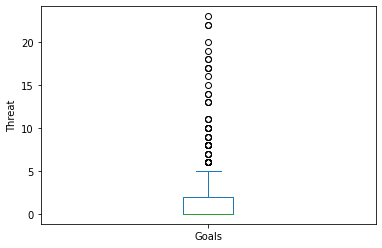

In [47]:
# Boxplot of Total_Points
df_key_stats_2019["Goals"].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.ylabel("Threat")
plt.show()

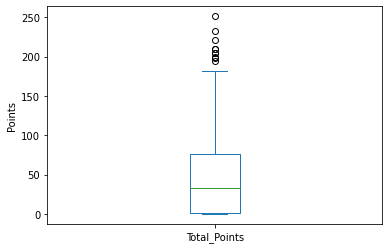

In [48]:
# Boxplot of Total_Points
df_key_stats_2019["Total_Points"].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.ylabel("Points")
plt.show()

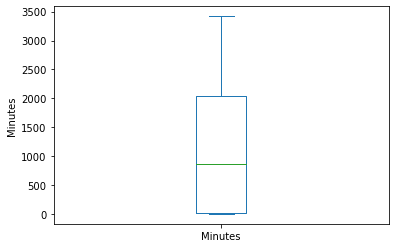

In [49]:
# Boxplot of Minutes
df_key_stats_2019["Minutes"].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.ylabel("Minutes")
plt.ylabel("Minutes")
plt.show()

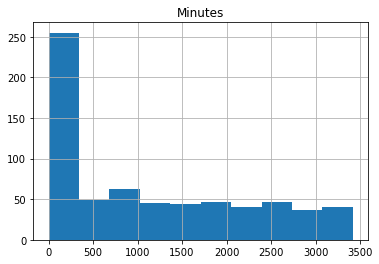

In [50]:
df_key_stats_2019[["Minutes"]].hist()
plt.show()

In [51]:
# weed out players who do not play even 600 minutes
df_key_stats_2019.sort_values('Minutes', inplace=True, ascending=True) # sort on minutes
df_key_stats_2019
count = 0
for index, row in df_key_stats_2019.iterrows():
    if(row["Minutes"] < 600):
        count += 1
        continue
    else:
        break
print(count)
df_key_stats_2019 = df_key_stats_2019[285:]

285


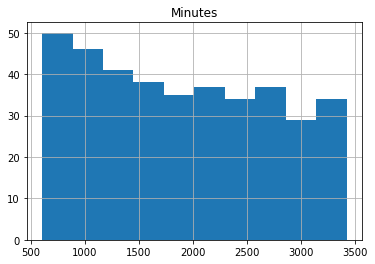

In [52]:
# better data to work with
df_key_stats_2019[["Minutes"]].hist()
plt.show()

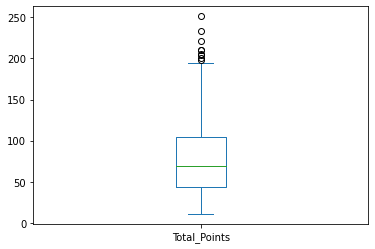

In [53]:
# Box plot check again
df_key_stats_2019["Total_Points"].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.show()

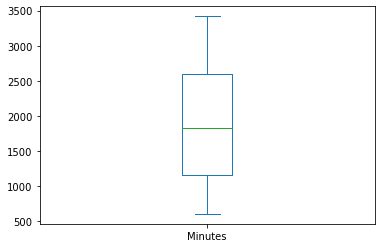

In [54]:
# Box plot check again
df_key_stats_2019["Minutes"].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.show()

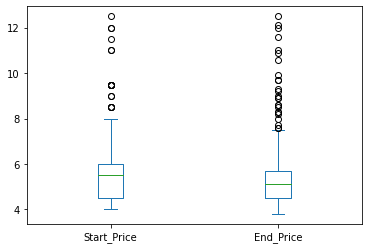

In [55]:
# boxplot of starting price and end price
df_key_stats_2019[["Start_Price","End_Price"]].plot(kind = "box", subplots = False,sharex = False, sharey = False)
plt.show()

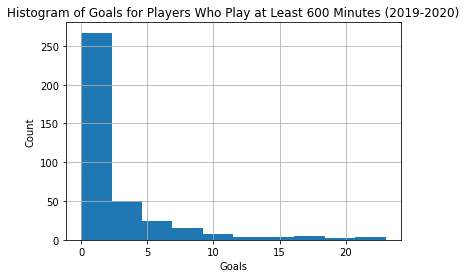

In [56]:
df_key_stats_2019["Goals"].hist()
plt.xlabel("Goals")
plt.ylabel("Count")
plt.title("Histogram of Goals for Players Who Play at Least 600 Minutes (2019-2020)")
plt.show()

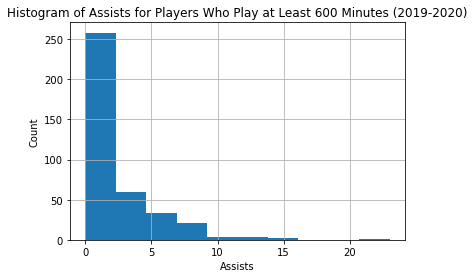

In [57]:
df_key_stats_2019["Assists"].hist()
plt.xlabel("Assists")
plt.ylabel("Count")
plt.title("Histogram of Assists for Players Who Play at Least 600 Minutes (2019-2020)")
plt.show()

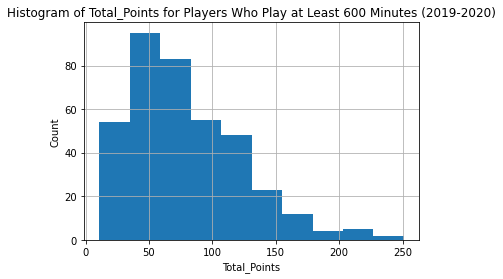

In [58]:
df_key_stats_2019["Total_Points"].hist()
plt.xlabel("Total_Points")
plt.ylabel("Count")
plt.title("Histogram of Total_Points for Players Who Play at Least 600 Minutes (2019-2020)")
plt.show()

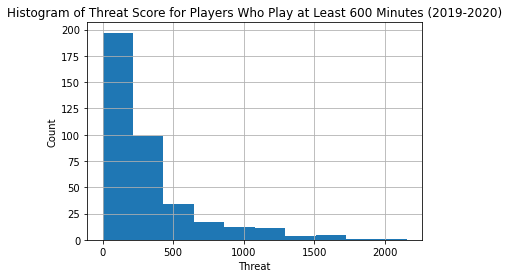

In [59]:
df_key_stats_2019["Threat"].hist()
plt.xlabel("Threat")
plt.ylabel("Count")
plt.title("Histogram of Threat Score for Players Who Play at Least 600 Minutes (2019-2020)")
plt.show()

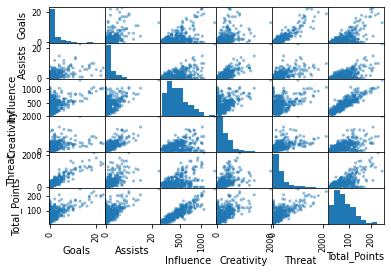

In [60]:
# quick scatter matrix view to see the relationship between variables
scatter_matrix(df_key_stats_2019[["Goals","Assists","Influence","Creativity","Threat","Total_Points"]])
plt.xticks(rotation = 90)
plt.show()

In [61]:
# split-out validation dataset (testing data)
array = df_key_stats_2019.values
X = array[:,4:] # row, columns of the features that I want
y = array[:,0] # output variable: player position
X_train,X_validation,Y_train,Y_validation = train_test_split(X,y,test_size = 0.2, random_state = 1) # random state means seed

In [62]:
# Algorithms
all_models = []
# liblinear has both L1 and L2 regularization
#     - Ridge Regression and Lasso Regression -> avoid overfitting and feature selection
# ovr means it's a binary problem for each label (one vs rest)
all_models.append(("LogReg",LogisticRegression(solver = "liblinear", multi_class="ovr")))

# maximizes seperation using our chosen features
#     - maximizing distance between means and minimizing variance 
#     - reduces features down 
#     - minimizes the scatter
all_models.append(("LDA",LinearDiscriminantAnalysis()))

# classification algorithm that memorizes observations to classify new data
#     - new data is classified by observing the "nearest neighbours"
all_models.append(("KNN", KNeighborsClassifier()))

# tree-like diagram where each leaf node is the outcome that is used to classify new data
all_models.append(("CART",DecisionTreeClassifier()))

# uses the Gaussian distribution to classify new data
all_models.append(("NB",GaussianNB()))

# uses a threshold that is the midpoint between different classifications
all_models.append(("SVM-g",SVC(gamma = "auto")))

# evaluate each model
results = []
names = []
# go through each model and perform cross validation to compare different machine learning algorithms
#     - kind of like foiling through the n_splits and training and testing for each algorithm
for name, model in all_models:
  kfold = StratifiedKFold(n_splits = 10, random_state = 1, shuffle = True)
  cv_results = cross_val_score(model, X_train,Y_train,cv=kfold, scoring = "accuracy") # evaluate score using cross validation
  results.append(cv_results)
  names.append(name)
  print("%s:%f(%f)"%(name,cv_results.mean(),cv_results.std())) # take the mean and standard deviation

LogReg:0.839032(0.042243)
LDA:0.825591(0.049653)
KNN:0.674624(0.049608)
CART:0.703763(0.099812)
NB:0.619140(0.101877)
SVM-g:0.430968(0.009297)


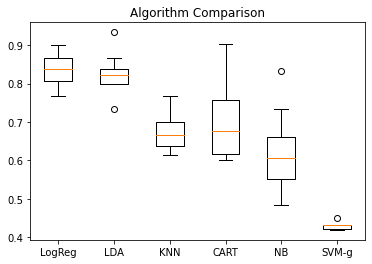

In [63]:
# compare algorithms
plt.boxplot(results,labels = names)
plt.title("Algorithm Comparison")
plt.show()
# best algorithm is Logistic Regression in terms of the mean

In [64]:
# best model - Logistic Regression
model = LogisticRegression(solver = "liblinear", multi_class="ovr",random_state = 1) 
model.fit(X_train,Y_train)
predictions = model.predict(X_validation)

In [65]:
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.8441558441558441
[[27  0  0  5]
 [ 0  6  0  1]
 [ 0  0  6  0]
 [ 5  1  0 26]]
              precision    recall  f1-score   support

         DEF       0.84      0.84      0.84        32
         FWD       0.86      0.86      0.86         7
         GKP       1.00      1.00      1.00         6
         MID       0.81      0.81      0.81        32

    accuracy                           0.84        77
   macro avg       0.88      0.88      0.88        77
weighted avg       0.84      0.84      0.84        77



{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'ovr', 'n_jobs': None, 'penalty': 'l2', 'random_state': 1, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
[-9.03765316e-01  1.58001683e+00 -1.71367946e-02 -7.48799738e-02
  1.18012223e-03 -6.29694949e-01  2.46767115e-02 -1.46271026e-01
  2.38498550e-01 -3.09437543e+00  8.43342372e-02  1.23505788e-01
  7.43159699e-01  1.22236956e-01  8.03231177e-04 -1.31408760e-03
 -4.50586529e-05]
Index(['End_Price', 'Points_Per_Game', 'Total_Points', 'Season_Value',
       'Minutes', 'Goals', 'Assists', 'Clean_Sheets', 'Own_Goals',
       'Penalties_Saved', 'Penalties_Missed', 'Yellow_Cards', 'Red_Cards',
       'Bonus_Points', 'Influence', 'Creativity', 'Threat'],
      dtype='object')
Feature: 0, Score: -0.90377
Feature: 1, Score: 1.58002
Feature: 2, Score: -0.01714
Feature: 3, Score: -0.07488
Feature: 4, Score: 0.00118
Feature: 5,

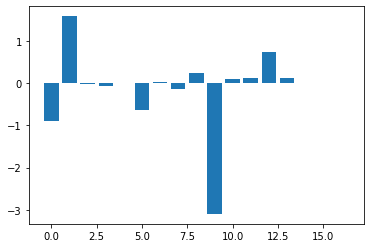

In [66]:
importance=model.coef_[0] # Coefficient of the features
print(model.get_params())
print(importance)
print(df_key_stats_2019.columns[4:])
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

In [67]:
lda = LinearDiscriminantAnalysis()
lda_model = lda.fit(X_train,Y_train)
predictions = lda.predict(X_validation)

In [68]:
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.8441558441558441
[[28  0  1  3]
 [ 0  4  0  3]
 [ 0  0  6  0]
 [ 5  0  0 27]]
              precision    recall  f1-score   support

         DEF       0.85      0.88      0.86        32
         FWD       1.00      0.57      0.73         7
         GKP       0.86      1.00      0.92         6
         MID       0.82      0.84      0.83        32

    accuracy                           0.84        77
   macro avg       0.88      0.82      0.84        77
weighted avg       0.85      0.84      0.84        77



In [69]:
# make predictions decision tree
clf = DecisionTreeClassifier(random_state = 1)
clf.fit(X_train,Y_train)
predictions = clf.predict(X_validation)

In [70]:
print(accuracy_score(Y_validation,predictions))
print(confusion_matrix(Y_validation,predictions))
print(classification_report(Y_validation,predictions))

0.7012987012987013
[[20  0  0 12]
 [ 0  6  0  1]
 [ 0  0  6  0]
 [ 6  4  0 22]]
              precision    recall  f1-score   support

         DEF       0.77      0.62      0.69        32
         FWD       0.60      0.86      0.71         7
         GKP       1.00      1.00      1.00         6
         MID       0.63      0.69      0.66        32

    accuracy                           0.70        77
   macro avg       0.75      0.79      0.76        77
weighted avg       0.71      0.70      0.70        77



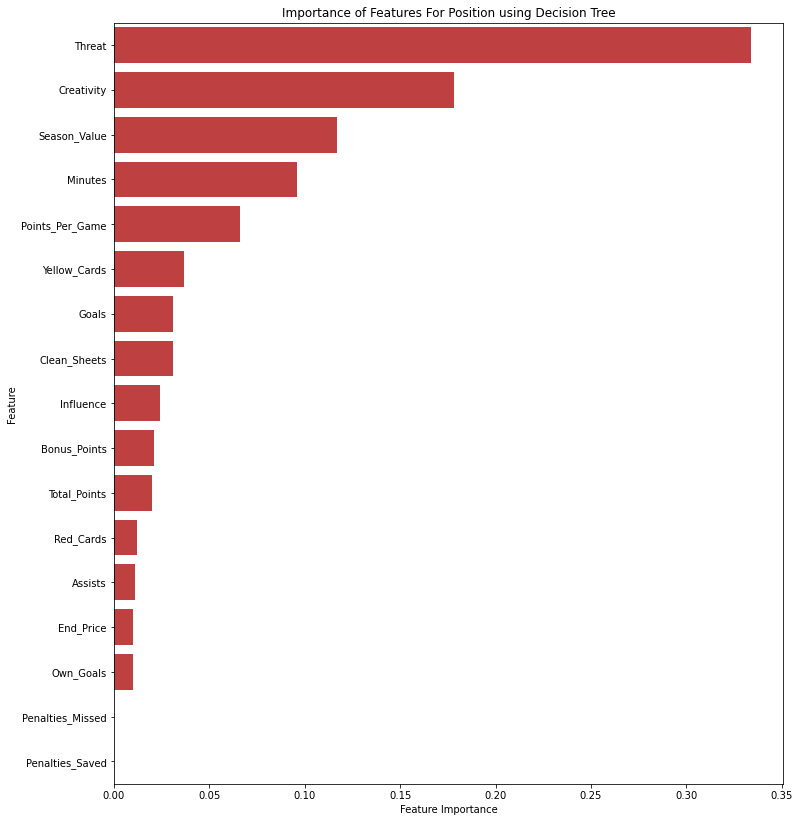

In [71]:
# Find the most important features using Decision Tree
important_features = pd.DataFrame({'feature':df_key_stats_2019.columns[4:],'importance':np.round(clf.feature_importances_,3)})
important_features = important_features.sort_values('importance',ascending=False)
 
f, ax = plt.subplots(figsize=(12, 14))
g = sns.barplot(x='importance', y='feature', data=important_features,
                color="red", saturation=.5, label="Total")
g.set(xlabel='Feature Importance', ylabel='Feature', title='Importance of Features For Position using Decision Tree')
plt.show()

In [72]:
# Get 2020 to 2021 data and use this model to predict their positions
url_2021 = 'https://fantasy.premierleague.com/api/bootstrap-static/'
req = requests.get(url_2021)
json = req.json()
json.keys()

dict_keys(['events', 'game_settings', 'phases', 'teams', 'total_players', 'elements', 'element_stats', 'element_types'])

In [73]:
df_elements = pd.DataFrame(json['elements'])
df_elements_types = pd.DataFrame(json['element_types'])
df_teams = pd.DataFrame(json['teams'])

In [74]:
df_elements.columns

Index(['chance_of_playing_next_round', 'chance_of_playing_this_round', 'code',
       'cost_change_event', 'cost_change_event_fall', 'cost_change_start',
       'cost_change_start_fall', 'dreamteam_count', 'element_type', 'ep_next',
       'ep_this', 'event_points', 'first_name', 'form', 'id', 'in_dreamteam',
       'news', 'news_added', 'now_cost', 'photo', 'points_per_game',
       'second_name', 'selected_by_percent', 'special', 'squad_number',
       'status', 'team', 'team_code', 'total_points', 'transfers_in',
       'transfers_in_event', 'transfers_out', 'transfers_out_event',
       'value_form', 'value_season', 'web_name', 'minutes', 'goals_scored',
       'assists', 'clean_sheets', 'goals_conceded', 'own_goals',
       'penalties_saved', 'penalties_missed', 'yellow_cards', 'red_cards',
       'saves', 'bonus', 'bps', 'influence', 'creativity', 'threat',
       'ict_index', 'influence_rank', 'influence_rank_type', 'creativity_rank',
       'creativity_rank_type', 'threat_rank'

In [75]:
pd.set_option('mode.chained_assignment', None) # ignore warning
df_key_stats_2021 = df_elements[["team","element_type","first_name","second_name","now_cost","points_per_game","total_points","value_season","minutes","goals_scored","assists","clean_sheets","own_goals","penalties_saved","penalties_missed","yellow_cards","red_cards","bonus","influence","creativity","threat"]]
df_key_stats_2021['position'] = df_key_stats_2021.element_type.map(df_elements_types.set_index('id').singular_name) # position of player
df_key_stats_2021['team'] = df_key_stats_2021.team.map(df_teams.set_index('id').name) # team of player
df_key_stats_2021['now_cost'] = df_key_stats_2021['now_cost'].map(lambda x: x/10) # cost of player
df_key_stats_2021['value'] = df_key_stats_2021.apply(lambda row: round(row.total_points/row.now_cost,2), axis = 1) # total points/cost of player
def change_name(x):
    if(x == "Midfielder"):
        return "MID"
    elif(x == "Forward"):
        return "FWD"
    elif(x == "Goalkeeper"):
        return "GKP"
    else:
        return "DEF"
        
df_key_stats_2021["position"] = [change_name(x) for x in df_key_stats_2021["position"]]
df_key_stats_2021

,team,element_type,first_name,second_name,now_cost,points_per_game,total_points,value_season,minutes,goals_scored,...,penalties_saved,penalties_missed,yellow_cards,red_cards,bonus,influence,creativity,threat,position,value
0,Arsenal,1,Bernd,Leno,4.5,1.3,4,0.9,270,0,...,0,0,0,0,0,79.0,0.0,0.0,GKP,0.89
1,Arsenal,1,Rúnar Alex,Rúnarsson,4.0,0.0,0,0.0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,GKP,0.00
2,Arsenal,3,Willian,Borges Da Silva,6.3,0.0,0,0.0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,MID,0.00
3,Arsenal,4,Pierre-Emerick,Aubameyang,9.6,3.1,44,4.6,1036,4,...,0,2,3,0,7,217.6,132.4,582.0,FWD,4.58
4,Arsenal,2,Cédric,Soares,4.2,0.5,2,0.5,214,0,...,0,0,1,0,0,31.4,40.5,1.0,DEF,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,Wolves,4,Hee-Chan,Hwang,5.4,3.4,47,8.7,981,4,...,0,0,1,0,8,198.4,126.9,237.0,FWD,8.70
675,Wolves,1,Louie,Moulden,4.0,0.0,0,0.0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,GKP,0.00
676,Wolves,1,James,Storer,4.0,0.0,0,0.0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,GKP,0.00
677,Wolves,2,Hugo,Bueno,4.0,0.0,0,0.0,0,0,...,0,0,0,0,0,0.0,0.0,0.0,DEF,0.00


In [76]:
df_key_stats_2021 = df_key_stats_2021[["position","first_name","second_name","now_cost","points_per_game","total_points","value_season","minutes","goals_scored","assists","clean_sheets","own_goals","penalties_saved","penalties_missed","yellow_cards","red_cards","bonus","influence","creativity","threat"]]
df_key_stats_2021

,position,first_name,second_name,now_cost,points_per_game,total_points,value_season,minutes,goals_scored,assists,clean_sheets,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,bonus,influence,creativity,threat
0,GKP,Bernd,Leno,4.5,1.3,4,0.9,270,0,0,0,0,0,0,0,0,0,79.0,0.0,0.0
1,GKP,Rúnar Alex,Rúnarsson,4.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2,MID,Willian,Borges Da Silva,6.3,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
3,FWD,Pierre-Emerick,Aubameyang,9.6,3.1,44,4.6,1036,4,1,6,0,0,2,3,0,7,217.6,132.4,582.0
4,DEF,Cédric,Soares,4.2,0.5,2,0.5,214,0,0,0,0,0,0,1,0,0,31.4,40.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,FWD,Hee-Chan,Hwang,5.4,3.4,47,8.7,981,4,0,5,0,0,0,1,0,8,198.4,126.9,237.0
675,GKP,Louie,Moulden,4.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
676,GKP,James,Storer,4.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
677,DEF,Hugo,Bueno,4.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0


In [77]:
df_key_stats_2021.sort_values('minutes', inplace=True, ascending=True) # sort on minutes
df_key_stats_2021 = df_key_stats_2021.reset_index(drop=True)
df_key_stats_2021

,position,first_name,second_name,now_cost,points_per_game,total_points,value_season,minutes,goals_scored,assists,clean_sheets,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,bonus,influence,creativity,threat
0,DEF,Leo Fuhr,Hjelde,4.0,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
1,DEF,Nathaniel,Phillips,4.2,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
2,MID,Xherdan,Shaqiri,5.9,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
3,GKP,Adrián,San Miguel del Castillo,4.3,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
4,MID,Archie,Gray,4.5,0.0,0,0.0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,DEF,Tyrick,Mitchell,4.5,2.9,57,12.7,1791,0,1,5,0,0,0,0,0,4,349.8,259.3,56.0
675,GKP,Edouard,Mendy,6.2,4.2,83,13.4,1800,0,0,8,0,0,0,2,0,3,408.2,0.0,0.0
676,GKP,Lukasz,Fabianski,5.0,3.5,71,14.2,1800,0,0,4,0,1,0,0,0,5,513.4,0.0,0.0
677,GKP,Ederson,Santana de Moraes,6.1,4.4,88,14.4,1800,0,0,11,0,0,0,2,0,4,299.2,0.0,0.0


array([[<AxesSubplot:title={'center':'minutes'}>]], dtype=object)

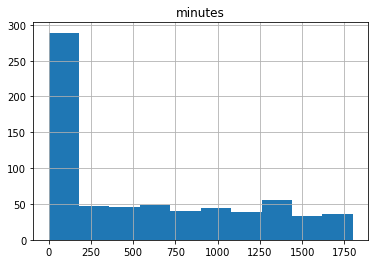

In [78]:
df_key_stats_2021[["minutes"]].hist()

In [79]:
# remove players who have less than 300 minutes of playing time
count = 0
for index, row in df_key_stats_2021.iterrows():
    if(row["minutes"] < 300):
        count += 1
        continue
    else:
        break
print(count)
df_key_stats_2021 = df_key_stats_2021[302:]
df_key_stats_2021 = df_key_stats_2021.reset_index(drop=True)

322


In [80]:
dataTypeDict = dict(df_key_stats_2021.dtypes)
print(dataTypeDict)

{'position': dtype('O'), 'first_name': dtype('O'), 'second_name': dtype('O'), 'now_cost': dtype('float64'), 'points_per_game': dtype('O'), 'total_points': dtype('int64'), 'value_season': dtype('O'), 'minutes': dtype('int64'), 'goals_scored': dtype('int64'), 'assists': dtype('int64'), 'clean_sheets': dtype('int64'), 'own_goals': dtype('int64'), 'penalties_saved': dtype('int64'), 'penalties_missed': dtype('int64'), 'yellow_cards': dtype('int64'), 'red_cards': dtype('int64'), 'bonus': dtype('int64'), 'influence': dtype('O'), 'creativity': dtype('O'), 'threat': dtype('O')}


In [81]:
df_key_stats_2021[["influence","creativity","threat"]] = df_key_stats_2021[["influence","creativity","threat"]].apply(lambda col:pd.to_numeric(col, errors='coerce'))

In [83]:
df_key_stats_2021
dataTypeDict = dict(df_key_stats_2021.dtypes)
print(dataTypeDict)

{'position': dtype('O'), 'first_name': dtype('O'), 'second_name': dtype('O'), 'now_cost': dtype('float64'), 'points_per_game': dtype('O'), 'total_points': dtype('int64'), 'value_season': dtype('O'), 'minutes': dtype('int64'), 'goals_scored': dtype('int64'), 'assists': dtype('int64'), 'clean_sheets': dtype('int64'), 'own_goals': dtype('int64'), 'penalties_saved': dtype('int64'), 'penalties_missed': dtype('int64'), 'yellow_cards': dtype('int64'), 'red_cards': dtype('int64'), 'bonus': dtype('int64'), 'influence': dtype('float64'), 'creativity': dtype('float64'), 'threat': dtype('float64')}


Text(0, 0.5, 'count')

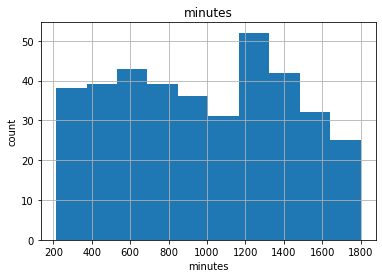

In [85]:
df_key_stats_2021[["minutes"]].hist()
plt.xlabel("minutes")
plt.ylabel("count")

In [86]:
print(df_key_stats_2021.shape) # 339 rows and 20 columns

(377, 20)


In [87]:
df_key_stats_2021.isnull().values.any()

False

In [88]:
print(df_key_stats_2021.describe())

         now_cost  total_points      minutes  goals_scored     assists  \
count  377.000000    377.000000   377.000000    377.000000  377.000000   
mean     5.467374     40.710875   976.570292      1.371353    1.246684   
std      1.464572     25.138208   444.652615      2.093563    1.645479   
min      3.700000      1.000000   214.000000      0.000000    0.000000   
25%      4.500000     22.000000   585.000000      0.000000    0.000000   
50%      5.000000     34.000000   970.000000      1.000000    1.000000   
75%      5.800000     56.000000  1350.000000      2.000000    2.000000   
max     12.800000    177.000000  1800.000000     16.000000   12.000000   

       clean_sheets   own_goals  penalties_saved  penalties_missed  \
count    377.000000  377.000000       377.000000        377.000000   
mean       3.122016    0.039788         0.018568          0.021220   
std        2.604409    0.195720         0.153592          0.161692   
min        0.000000    0.000000         0.000000     

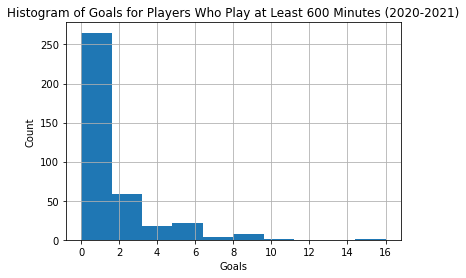

In [89]:
df_key_stats_2021["goals_scored"].hist()
plt.xlabel("Goals")
plt.ylabel("Count")
plt.title("Histogram of Goals for Players Who Play at Least 600 Minutes (2020-2021)")
plt.show()

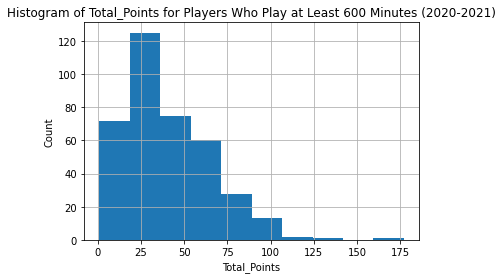

In [90]:
df_key_stats_2021["total_points"].hist()
plt.xlabel("Total_Points")
plt.ylabel("Count")
plt.title("Histogram of Total_Points for Players Who Play at Least 600 Minutes (2020-2021)")
plt.show()

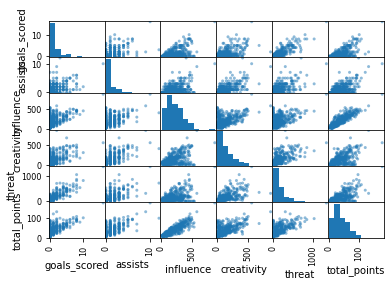

In [91]:
# quick scatter matrix view to see the relationship between variables
scatter_matrix(df_key_stats_2021[["goals_scored","assists","influence","creativity","threat","total_points"]])
plt.xticks(rotation = 90)
plt.show()

In [92]:
array = df_key_stats_2021.values
new_input_X = array[:,3:]
print(new_input_X)
true = array[:,0] # true position of the player
predictions = model.predict(new_input_X)
print(new_input_X)
print(new_input_X, predictions)

[[4.2 '0.5' 2 ... 31.4 40.5 1.0]
 [5.7 '1.7' 12 ... 68.8 93.2 110.0]
 [5.9 '1.2' 10 ... 27.8 75.4 57.0]
 ...
 [5.0 '3.5' 71 ... 513.4 0.0 0.0]
 [6.1 '4.4' 88 ... 299.2 0.0 0.0]
 [6.2 '4.6' 92 ... 348.0 179.9 304.0]]
[[4.2 '0.5' 2 ... 31.4 40.5 1.0]
 [5.7 '1.7' 12 ... 68.8 93.2 110.0]
 [5.9 '1.2' 10 ... 27.8 75.4 57.0]
 ...
 [5.0 '3.5' 71 ... 513.4 0.0 0.0]
 [6.1 '4.4' 88 ... 299.2 0.0 0.0]
 [6.2 '4.6' 92 ... 348.0 179.9 304.0]]
[[4.2 '0.5' 2 ... 31.4 40.5 1.0]
 [5.7 '1.7' 12 ... 68.8 93.2 110.0]
 [5.9 '1.2' 10 ... 27.8 75.4 57.0]
 ...
 [5.0 '3.5' 71 ... 513.4 0.0 0.0]
 [6.1 '4.4' 88 ... 299.2 0.0 0.0]
 [6.2 '4.6' 92 ... 348.0 179.9 304.0]] ['MID' 'MID' 'MID' 'MID' 'MID' 'MID' 'MID' 'MID' 'FWD' 'DEF' 'MID' 'MID'
 'FWD' 'GKP' 'MID' 'MID' 'MID' 'MID' 'FWD' 'MID' 'FWD' 'DEF' 'MID' 'MID'
 'MID' 'MID' 'DEF' 'MID' 'MID' 'FWD' 'MID' 'MID' 'FWD' 'DEF' 'GKP' 'FWD'
 'MID' 'MID' 'MID' 'FWD' 'FWD' 'DEF' 'MID' 'DEF' 'DEF' 'MID' 'MID' 'MID'
 'MID' 'MID' 'MID' 'MID' 'MID' 'MID' 'FWD' 'MID' 'MID' 'MID'

In [93]:
print(accuracy_score(true, predictions))
print(confusion_matrix(true, predictions))
print(classification_report(true, predictions))


0.7957559681697612
[[108   2   0  30]
 [  0  36   0  10]
 [  0   0  25   0]
 [ 27   8   0 131]]
              precision    recall  f1-score   support

         DEF       0.80      0.77      0.79       140
         FWD       0.78      0.78      0.78        46
         GKP       1.00      1.00      1.00        25
         MID       0.77      0.79      0.78       166

    accuracy                           0.80       377
   macro avg       0.84      0.84      0.84       377
weighted avg       0.80      0.80      0.80       377



In [94]:
df_key_stats_2021["predicted"] = predictions
df_key_stats_2021 = df_key_stats_2021[["predicted","position","first_name","second_name","now_cost","points_per_game","total_points","value_season","minutes","goals_scored","assists","clean_sheets","own_goals","penalties_saved","penalties_missed","yellow_cards","red_cards","bonus","influence","creativity","threat"]]
df_key_stats_2021 = df_key_stats_2021.sort_values('total_points', inplace=False, ascending=False)
df_key_stats_2021.head(50)

,predicted,position,first_name,second_name,now_cost,points_per_game,total_points,value_season,minutes,goals_scored,...,clean_sheets,own_goals,penalties_saved,penalties_missed,yellow_cards,red_cards,bonus,influence,creativity,threat
369,MID,MID,Mohamed,Salah,12.8,8.8,177,13.8,1783,16,...,10,0,0,1,1,0,20,854.4,565.5,1347.0
339,DEF,DEF,Trent,Alexander-Arnold,8.4,7.3,132,15.7,1593,2,...,9,0,0,0,1,0,27,571.0,878.1,306.0
370,DEF,DEF,João Pedro Cavaco,Cancelo,7.0,6.0,121,17.3,1787,1,...,11,0,0,0,5,0,17,462.4,443.1,429.0
320,MID,MID,Heung-Min,Son,10.7,6.4,108,10.1,1483,8,...,8,0,0,0,0,0,11,446.8,508.1,646.0
359,MID,MID,Bernardo Mota,Veiga de Carvalho e Silva,7.5,5.2,103,13.7,1703,7,...,10,0,0,0,5,0,13,487.6,483.0,599.0
288,MID,MID,Diogo,Jota,8.2,5.3,101,12.3,1370,10,...,9,0,0,0,1,0,2,448.6,314.3,807.0
354,MID,MID,Jarrod,Bowen,6.7,5.0,99,14.8,1678,3,...,4,0,0,0,2,0,7,401.2,415.6,707.0
366,MID,MID,Sadio,Mané,11.8,4.8,97,8.2,1710,8,...,9,0,0,0,2,0,2,441.6,359.4,1037.0
355,DEF,DEF,Rúben Santos,Gato Alves Dias,6.3,4.8,96,15.2,1681,2,...,10,0,0,0,4,0,6,433.8,151.7,166.0
250,MID,MID,Mason,Mount,7.7,5.3,95,12.3,1244,7,...,5,0,0,0,2,0,8,488.0,492.8,554.0
